In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load data
boston_df=pd.read_csv('/content/boston_data.csv')
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [3]:
# lets split X and y
X=boston_df.drop(['medv'],axis=1)
y=boston_df['medv']

In [4]:
print(X.shape)
print(y.shape)

(404, 13)
(404,)


In [5]:
# importing libraries
from tensorflow import keras
from keras.callbacks import EarlyStopping

In [6]:
# feature normalization
normalized_features=keras.utils.normalize(X.values)
print(normalized_features)

[[3.26748428e-04 0.00000000e+00 2.22483655e-02 ... 3.95160609e-02
  7.75790833e-01 2.03343063e-02]
 [2.10083113e-04 5.08528062e-02 1.04349958e-02 ... 4.00720113e-02
  8.07339152e-01 1.87545149e-02]
 [6.90693646e-04 0.00000000e+00 1.95703122e-02 ... 3.63731056e-02
  7.83286921e-01 1.97086882e-02]
 ...
 [3.31797923e-05 1.98946123e-01 2.67472010e-03 ... 3.00629697e-02
  8.74301895e-01 6.98521943e-03]
 [3.99605424e-05 1.65286915e-01 1.43896844e-03 ... 3.36407486e-02
  7.71792666e-01 1.12200647e-02]
 [1.69825664e-04 6.17997320e-02 1.01557560e-02 ... 3.41958517e-02
  7.81581211e-01 1.31015432e-02]]


In [7]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_features, y.values,test_size=0.2, random_state=21) 

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(323, 13)
(81, 13)
(323,)
(81,)


In [9]:
# define model
model=keras.Sequential([
                        keras.layers.Dense(13,input_shape=(13,),kernel_initializer='normal',activation='relu'),
                        keras.layers.Dense(1,kernel_initializer='normal')
])

In [10]:
# compile model
model.compile(loss='mse',optimizer='adam',metrics=['mae'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 14        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [12]:
# fit the model
es=EarlyStopping(monitor='val_loss',patience=15)
history = model.fit(X_train, y_train, epochs=300,validation_split=0.2, verbose=1, callbacks=[es])

Epoch 1/300
9/9 [==============================] - 3s 66ms/step - loss: 589.2837 - mae: 22.5712 - val_loss: 570.5535 - val_mae: 21.9793
Epoch 2/300
9/9 [==============================] - 0s 8ms/step - loss: 550.6543 - mae: 21.7953 - val_loss: 569.6536 - val_mae: 21.9592
Epoch 3/300
9/9 [==============================] - 0s 7ms/step - loss: 596.5548 - mae: 22.6103 - val_loss: 568.6901 - val_mae: 21.9375
Epoch 4/300
9/9 [==============================] - 0s 9ms/step - loss: 554.9099 - mae: 21.9229 - val_loss: 567.5262 - val_mae: 21.9112
Epoch 5/300
9/9 [==============================] - 0s 8ms/step - loss: 597.5847 - mae: 22.5286 - val_loss: 566.1479 - val_mae: 21.8799
Epoch 6/300
9/9 [==============================] - 0s 8ms/step - loss: 587.9289 - mae: 22.3823 - val_loss: 564.5523 - val_mae: 21.8437
Epoch 7/300
9/9 [==============================] - 0s 7ms/step - loss: 597.9903 - mae: 22.5079 - val_loss: 562.7175 - val_mae: 21.8019
Epoch 8/300
9/9 [==============================] - 0s 

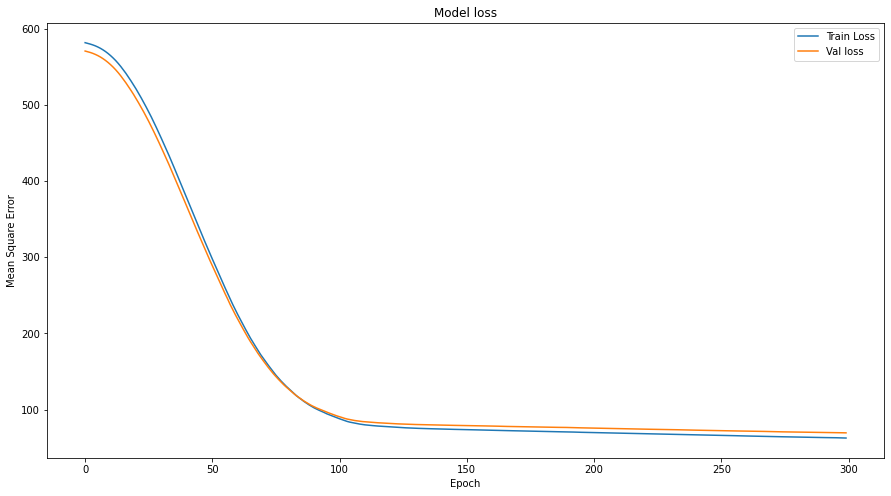

In [13]:
# show the graph of model loss in trainig and validation 
plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

In [14]:
#check the model performace in test dataset
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])

3/3 [==============================] - 0s 5ms/step - loss: 53.7339 - mae: 4.9865
loss value:  53.733856201171875
Mean absolute error:  4.986474990844727


In [15]:
y_pred=model.predict(X_test).flatten()
print(y_pred)

[23.754423 24.507673 21.193754 23.374666 22.573366 21.138906 21.170721
 23.318514 21.08884  24.618187 23.955116 24.432426 18.027178 25.372204
 23.8914   24.230112 18.86465  22.986317 24.470774 16.708433 23.762512
 23.719948 20.740927 20.438297 24.60363  20.998592 24.258566 22.897184
 24.323748 23.555706 20.847513 18.760626 16.895906 23.61187  16.91127
 18.763132 23.746975 24.358223 21.133673 23.833883 21.078299 21.249258
 24.38007  24.107367 24.193779 23.783552 24.107595 25.26754  23.725801
 26.045511 20.925945 24.117426 24.359955 22.831564 23.067144 25.842041
 24.02707  21.206135 20.526857 23.06434  23.44375  24.572937 19.944963
 23.484882 23.803226 24.079813 16.443727 23.375841 23.499414 23.028898
 23.948582 20.975382 23.09945  16.269941 25.082195 23.707155 24.019533
 23.816446 23.811842 23.174986 23.665741]


In [16]:
# lets create a df comparing actual and predicted values
prediction_df = pd.DataFrame(list(zip(y_test, y_pred)), 
                    columns=['Actual Value','Predicted Value'])
prediction_df.head(10)

,Actual Value,Predicted Value
0,29.8,23.754423
1,21.1,24.507673
2,11.3,21.193754
3,22.0,23.374666
4,17.0,22.573366
5,9.7,21.138906
6,25.0,21.170721
7,24.6,23.318514
8,17.8,21.088840
9,23.9,24.618187


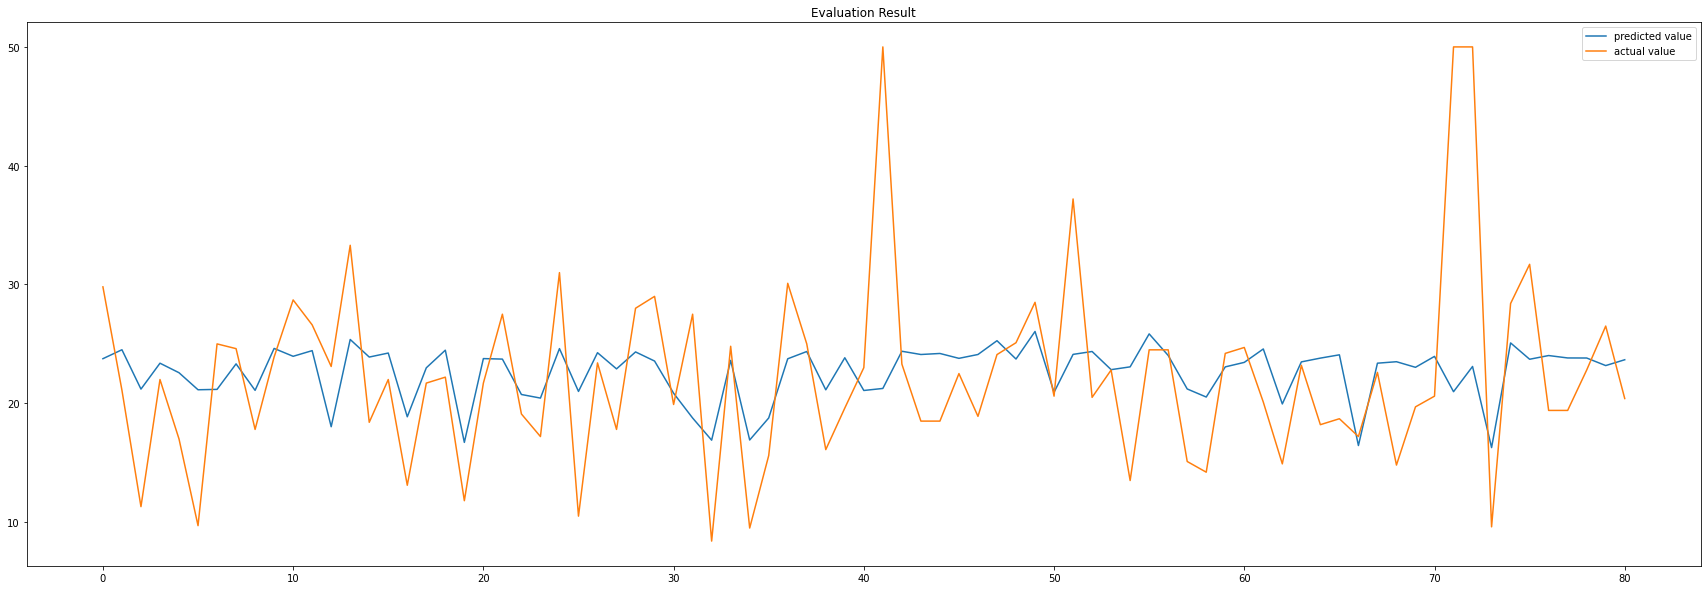

In [17]:
# lets visualize with line graph
#visiulize the true value with predicted value (using line graph)
x = y_pred
y = y_test
plt.figure(figsize=(30,10))
plt.plot(x, label='predicted value')
plt.plot(y, label='actual value')
plt.title('Evaluation Result')
plt.legend()
plt.show()

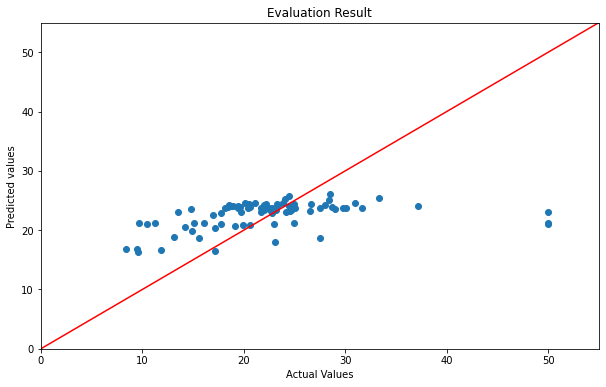

In [18]:
# lets check the scatter plot
# visualize the prediction uisng diagonal line
y = y_pred #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

In [19]:
#as we can see there are outliers in the dataset.lets remove them
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1

In [20]:
boston_df1=boston_df.copy()
boston_df1.shape

(404, 14)

In [21]:
#removing outliers
clean_data = boston_df1[~((boston_df1 < (Q1 - 1.5 * IQR)) |(boston_df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
clean_data.shape

(228, 14)

In [22]:
# lets split X and y now
X=clean_data.drop(['medv'],axis=1)
y=clean_data['medv']

In [23]:
print(X.shape)
print(y.shape)

(228, 13)
(228,)


In [24]:
# feature normalization
normalized_features=keras.utils.normalize(X.values)
print(normalized_features)

[[3.26748428e-04 0.00000000e+00 2.22483655e-02 ... 3.95160609e-02
  7.75790833e-01 2.03343063e-02]
 [2.10083113e-04 5.08528062e-02 1.04349958e-02 ... 4.00720113e-02
  8.07339152e-01 1.87545149e-02]
 [6.90693646e-04 0.00000000e+00 1.95703122e-02 ... 3.63731056e-02
  7.83286921e-01 1.97086882e-02]
 ...
 [1.35679694e-03 0.00000000e+00 1.64372119e-02 ... 4.24055837e-02
  7.61038875e-01 2.99060330e-02]
 [1.19193150e-02 0.00000000e+00 2.31254712e-02 ... 2.58085369e-02
  5.07099421e-01 2.31638007e-02]
 [1.69825664e-04 6.17997320e-02 1.01557560e-02 ... 3.41958517e-02
  7.81581211e-01 1.31015432e-02]]


In [25]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_features, y.values,test_size=0.2, random_state=21) 

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(182, 13)
(46, 13)
(182,)
(46,)


In [27]:
# model creation
model = keras.Sequential()

model.add(keras.layers.Dense(150, activation='relu', input_shape=(13,)))
model.add(keras.layers.Dense(150, activation='relu'))
model.add(keras.layers.Dense(150, activation='relu'))
model.add(keras.layers.Dense(150, activation='relu'))
model.add(keras.layers.Dense(150, activation='relu'))
model.add(keras.layers.Dense(1))


In [28]:
# compile model
model.compile(loss='mse',optimizer='adam',metrics=['mae'])

In [29]:
# fit the model
es=EarlyStopping(monitor='val_loss',patience=15)
history = model.fit(X_train, y_train, epochs=300,validation_split=0.2, verbose=1, callbacks=[es])

Epoch 1/300
5/5 [==============================] - 1s 52ms/step - loss: 457.5585 - mae: 20.7990 - val_loss: 461.7179 - val_mae: 20.9344
Epoch 2/300
5/5 [==============================] - 0s 13ms/step - loss: 439.5262 - mae: 20.4593 - val_loss: 418.6185 - val_mae: 19.8779
Epoch 3/300
5/5 [==============================] - 0s 13ms/step - loss: 393.0223 - mae: 19.1427 - val_loss: 312.8913 - val_mae: 17.0128
Epoch 4/300
5/5 [==============================] - 0s 12ms/step - loss: 278.0206 - mae: 15.7812 - val_loss: 120.6951 - val_mae: 9.8643
Epoch 5/300
5/5 [==============================] - 0s 12ms/step - loss: 69.7414 - mae: 7.2068 - val_loss: 51.9387 - val_mae: 6.2632
Epoch 6/300
5/5 [==============================] - 0s 12ms/step - loss: 76.7811 - mae: 7.6248 - val_loss: 49.3679 - val_mae: 6.0998
Epoch 7/300
5/5 [==============================] - 0s 13ms/step - loss: 43.9252 - mae: 5.1997 - val_loss: 31.1980 - val_mae: 4.3067
Epoch 8/300
5/5 [==============================] - 0s 14ms/st

In [30]:
#check the model performace in test dataset
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])

2/2 [==============================] - 0s 5ms/step - loss: 11.0142 - mae: 2.4006
loss value:  11.014220237731934
Mean absolute error:  2.4006261825561523


In [31]:
y_pred = model.predict(X_test).flatten()
y_pred

array([18.915949, 16.40244 , 21.043291, 20.208078, 18.590967, 22.157982,
       20.034504, 20.553026, 23.704046, 25.613127, 17.750029, 27.611488,
       17.914804, 19.49517 , 21.798595, 25.335226, 18.757145, 21.86751 ,
       22.70186 , 23.715342, 27.072424, 23.574406, 26.21108 , 21.038963,
       26.001894, 15.090642, 23.589354, 23.086369, 27.221155, 18.322931,
       18.28503 , 20.351427, 20.604313, 21.563738, 24.741156, 23.978617,
       17.94391 , 21.253916, 21.337719, 19.214819, 21.555868, 18.956259,
       22.124928, 22.669424, 18.337757, 20.155922], dtype=float32)

In [32]:
true_predicted = pd.DataFrame(list(zip(y_test, y_pred)), columns=['Actual Value','Predicted Value'])
true_predicted.head(10)

,Actual Value,Predicted Value
0,24.3,18.915949
1,13.3,16.402439
2,21.2,21.043291
3,18.5,20.208078
4,20.0,18.590967
5,21.4,22.157982
6,20.5,20.034504
7,22.8,20.553026
8,28.1,23.704046
9,29.6,25.613127


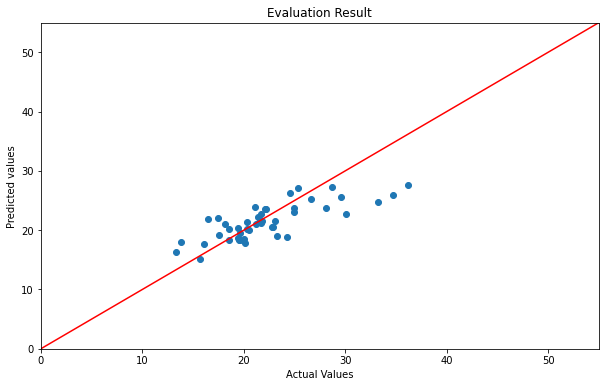

In [33]:
# lets check the scatter plot
# visualize the prediction uisng diagonal line
y = y_pred #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

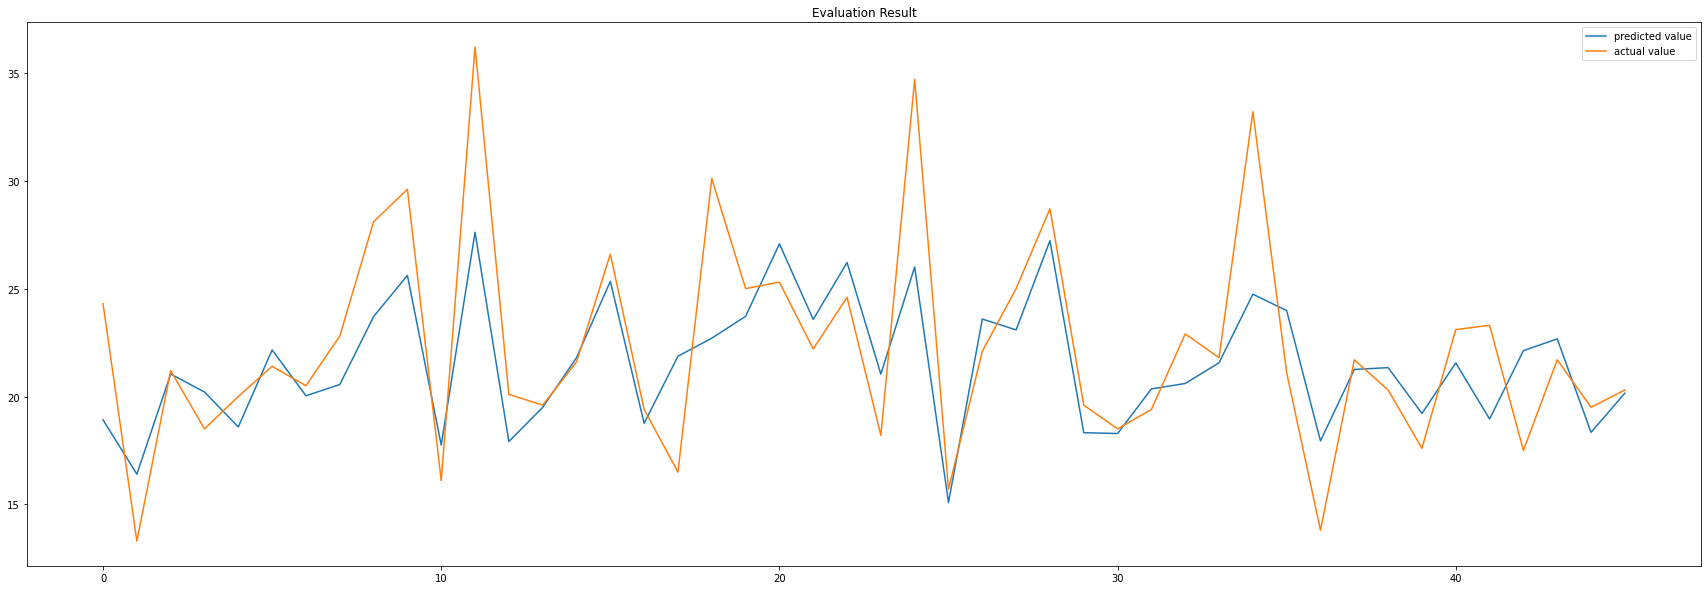

In [34]:
# lets visualize with line graph
#visiulize the true value with predicted value (using line graph)
x = y_pred
y = y_test
plt.figure(figsize=(30,10))
plt.plot(x, label='predicted value')
plt.plot(y, label='actual value')
plt.title('Evaluation Result')
plt.legend()
plt.show()

In [35]:
from keras.models import load_model
model.save('model.h5')

In [36]:
# load the saved model
ann_model=load_model('model.h5')

In [37]:
predictions=ann_model.predict(X_test)

In [38]:
pred_df = pd.DataFrame(list(zip(y_test, predictions)), columns=['Actual Value','Predicted Value'])
pred_df.head(10)

,Actual Value,Predicted Value
0,24.3,[18.915949]
1,13.3,[16.40244]
2,21.2,[21.043291]
3,18.5,[20.208078]
4,20.0,[18.590967]
5,21.4,[22.157982]
6,20.5,[20.034504]
7,22.8,[20.553026]
8,28.1,[23.704046]
9,29.6,[25.613127]


In [39]:
# lets check the prediction on index 0
prediction=ann_model.predict(keras.utils.normalize([[0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88]]))
prediction

array([[23.763556]], dtype=float32)

In [41]:
# lets check the prediction on index 3
prediction1=ann_model.predict(keras.utils.normalize([[2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45]]))
prediction1

array([[15.009454]], dtype=float32)

In [42]:
prediction1.item()

15.009453773498535